In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### FFT of a temporally varying signal 

We shall consider a signal that varies with time. 

In [2]:
sampling_rate = 2000
sampling_interval = 1./sampling_rate
total_time = 3
t = np.arange(0, total_time, sampling_interval)
f = 5.5 * np.cos(2 * np.pi * 10 * t  - np.pi /4) - \
        12.3 * np.cos(2 * np.pi * 15 * t) + \
        3.2 * np.cos(2 * np.pi * 25 * t) + \
        6 * np.cos(2 * np.pi * 200 * t - np.pi/8) + \
        np.random.randn(t.shape[0]) * 2 # the signal as a function of time.

"""
f2 = 5.5 * np.cos(2*t - np.pi /4) - \
        2.3 * np.cos(10*t) + \
        3.2 * np.cos(25*t - np.pi/6)

f3 = 5.5 * np.cos(2*t - np.pi /4) - \
        2.3 * np.cos(10*t)

f4 = np.sin(120*t)
"""

'\nf2 = 5.5 * np.cos(2*t - np.pi /4) -         2.3 * np.cos(10*t) +         3.2 * np.cos(25*t - np.pi/6)\n\nf3 = 5.5 * np.cos(2*t - np.pi /4) -         2.3 * np.cos(10*t)\n\nf4 = np.sin(120*t)\n'

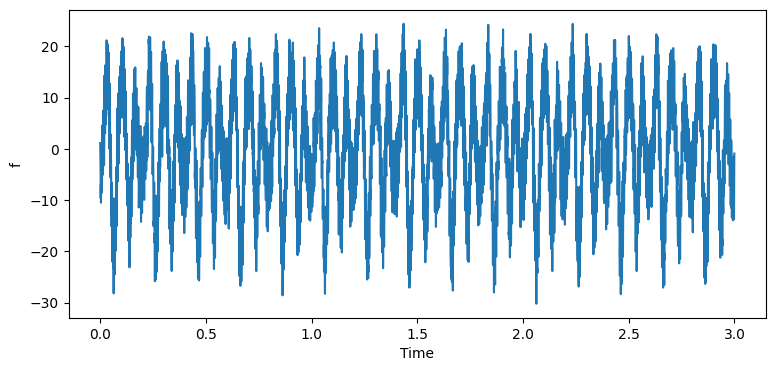

In [3]:
fig = plt.figure(figsize=(9, 4))
plt.plot(t,f)
plt.xlabel('Time')
plt.ylabel('f')
plt.show()

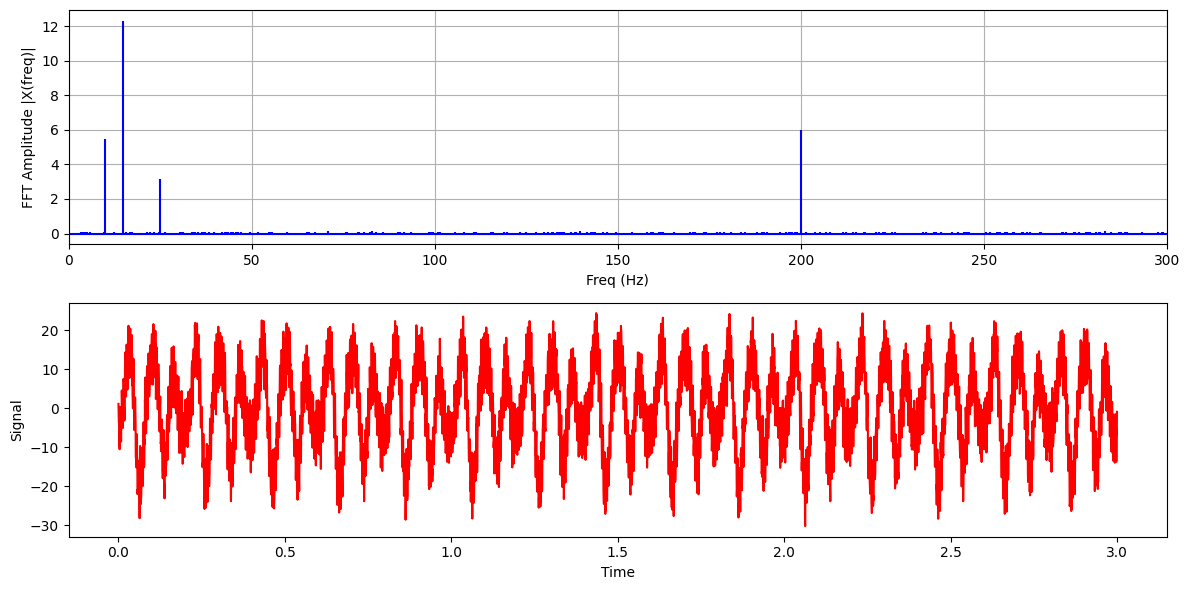

In [6]:
# sampling interval
Y = np.fft.fft(f) 
N = len(Y)
n = np.arange(N)
T = N/sampling_rate
freq = sampling_rate * np.arange(0, int(N/2))/N  

P2 = np.abs(Y/N);
P1 = P2[0:int(N/2)]
P1[1:-2] = 2*P1[1:-2]


plt.figure(figsize = (12, 6))
plt.subplot(211)

plt.stem(freq, P1 , 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 300)

plt.subplot(212)
plt.plot(t, np.real( np.fft.ifft(Y) ), 'r')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.tight_layout()
plt.show()

<mark> To do </mark>

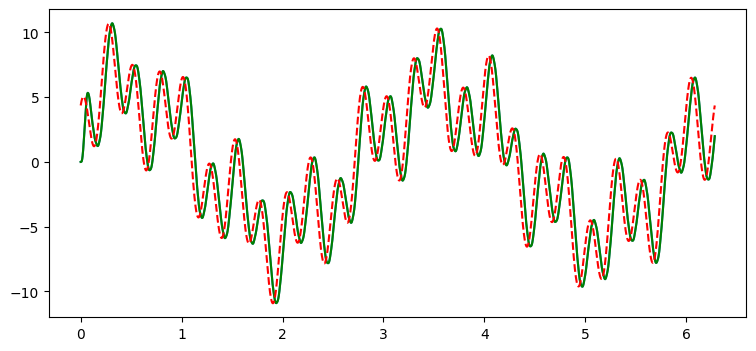

In [6]:
fc = 150
normed = fc / (fs / 2)
sos = signal.butter(N=4, Wn= fc / (40), btype='lowpass', output='sos', fs=1000)
filtered = signal.sosfilt(sos,f)
fig = plt.figure(figsize=(9, 4))
plt.plot(t, filtered)
#plt.plot(t,f,'--',color='blue')
plt.plot(t,filtered,color='green')
#fig = plt.figure(figsize=(9, 4))
#plt.plot(t,filtered,color='dodgerblue')
plt.plot(t,f2,'--',color='red')


<BarContainer object of 249 artists>

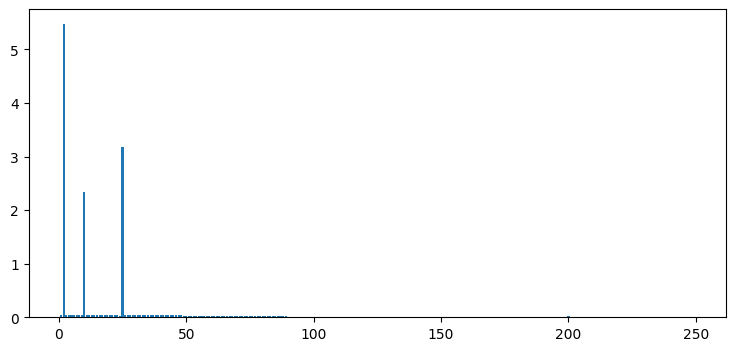

In [7]:
f_fft_of_sample = np.fft.fft(filtered)
f_fft_amplitudes = 2.0 / num_pts * np.abs(f_fft_of_sample)
f_fft_phases = np.angle(f_fft_of_sample)
filtered_harmonics = np.arange(1, 250)
fig = plt.figure(figsize=(9, 4))
plt.bar(filtered_harmonics, f_fft_amplitudes[filtered_harmonics])

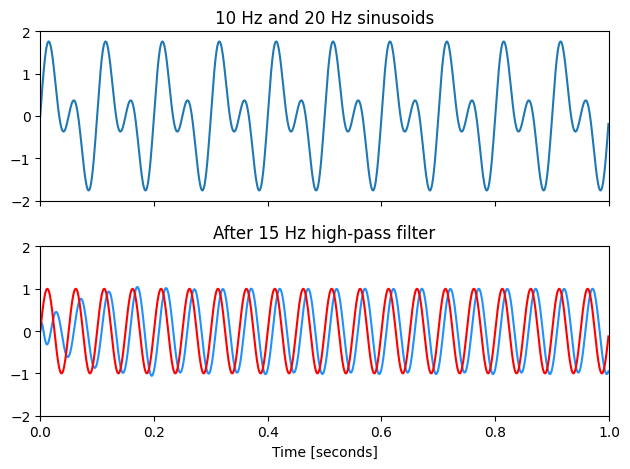

In [8]:
#Note: this is just a snippet of example code that implements a butterworth filter on the data specified.
#This is incompatible with the previous sections of code!!

t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
f3 = np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])


sos = signal.butter(10, 15, 'hp', fs=1000, analog = False, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered, color='dodgerblue')
ax2.plot(t,f3,color='red')
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()